# Données Série "Time Series"

## Imports

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Exercice 0:
- Charger le dataset fourni dans le dossier "data" avec la date comme index.
- Quel est la plage horaire totale couverte par le dataset ?
- Quelle est la taille du dataframe (nombre de lignes et de colonnes) ?

## Charger le dataset fourni dans le dossier "data" avec la date comme index.

In [429]:
df = pd.read_csv("data/dataset.csv")
df.rename({"date.utc": "datetime"}, axis=1, inplace=True)
df.datetime = pd.to_datetime(df.datetime)
df.set_index("datetime", inplace=True)
df

,value,occupancy,value2,value3
datetime,,,,
2019-06-18 04:00:00+00:00,26.5,79,60,21
2019-06-18 03:00:00+00:00,45.5,58,55,27
2019-06-18 02:00:00+00:00,39.8,86,57,49
2019-06-18 01:00:00+00:00,60.1,25,77,17
2019-06-18 00:00:00+00:00,66.2,10,72,73
...,...,...,...,...
2019-05-28 12:00:00+00:00,24.8,41,16,53
2019-05-28 11:00:00+00:00,20.5,6,97,95
2019-05-28 10:00:00+00:00,21.6,24,44,48


## Quel est la plage horaire totale couverte par le dataset ?

In [430]:
df.index[0] - df.index[-1]

Timedelta('20 days 20:00:00')

## Quelle est la taille du dataframe (nombre de lignes et de colonnes) ?

In [431]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 478
Number of columns: 4


# Exercice 1:
- Plotter chaque colonnes du dataset.
- Quelles sont selon vous les colonnes les plus corrélées avec "Occupancy", en regardant les graphes ?

## Plotter chaque colonnes du dataset

<AxesSubplot:xlabel='datetime'>

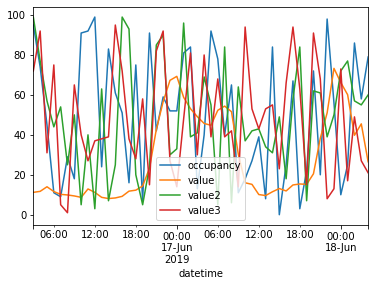

In [432]:
# TODO: remove .head(n)
df[["occupancy", "value", "value2", "value3"]].head(50).plot()

## Quelles sont selon vous les colonnes les plus corrélées avec "Occupancy", en regardant les graphes ?
Value2 est bien corrélé avec occupancy

# Exercice 2:
- Calculer les corrélations entre les colonnes du dataset.
- Les afficher sous format numériques et sous format de heatmap 
   - Les deux en même temps, c'est-à-dire sous format de heatmap avec les valeurs numériques est accepté
- Est-ce que les corrélations numériques correspondent à votre prédiction à l'exercice précédent ?

## Calculer les corrélations entre les colonnes du dataset

In [433]:
df_corr = df.corr()
df_corr

,value,occupancy,value2,value3
value,1.000000,0.066039,-0.025242,-0.100107
occupancy,0.066039,1.000000,0.018467,-0.134787
value2,-0.025242,0.018467,1.000000,0.038501
value3,-0.100107,-0.134787,0.038501,1.000000


## Les afficher sous format numériques et sous format de heatmap
Fait avec `matplotlib`

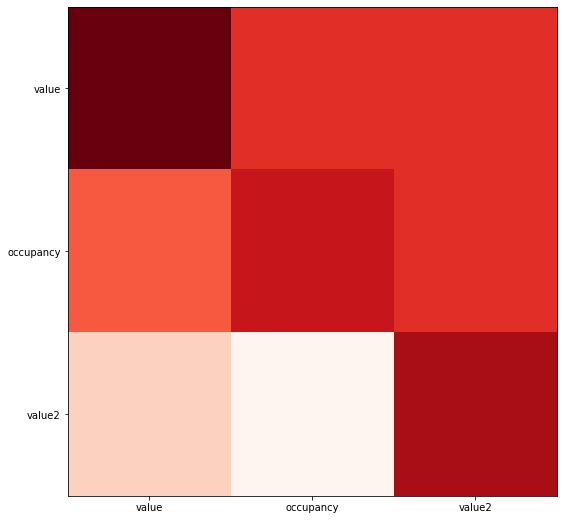

In [434]:
fig, ax = plt.subplots(figsize=(11, 9))

x = df_corr.index.to_numpy()
y = df_corr.columns.to_numpy()

ax.set_xticks(np.arange(len(x) - 1))
ax.set_yticks(np.arange(len(y) - 1))

ax.set_xticklabels(x[:-1])
ax.set_yticklabels(y[:-1])

df_used_values = np.tril(df_corr.to_numpy(), -1)[1:, :-1]

ax.imshow(df_used_values, cmap=cm.Reds)

## Les deux en même temps, c'est-à-dire sous format de heatmap avec les valeurs numériques
Fait avec `seaborn`

<AxesSubplot:>

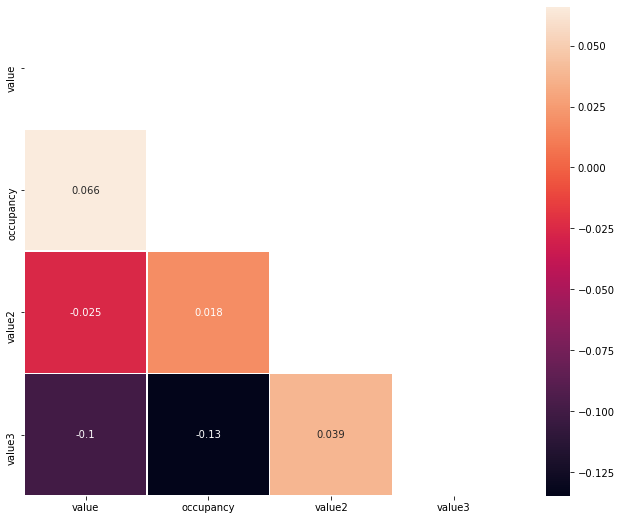

In [435]:
f, ax = plt.subplots(figsize=(11, 9))

# Remove upper triangle, it's not needed
mask = np.triu(np.ones_like(df_corr , dtype=bool))

sns.heatmap(df_corr, mask=mask, annot=True,  linewidths=.5)

## Est-ce que les corrélations numériques correspondent à votre prédiction à l'exercice précédent ?
Oui, on voit sur la deuxième heatmap avec les valeurs numérique que `value2` et `occupancy` on une valeur de corrélation élevée

# Exercice 3:
- Afficher les boxplots par colonne et par jour, avec un graphe par colonne.
  - Vous devriez avoir une graphe avec un boxplot par jour pour la première colonne, puis un graphe avec un boxplot par jour pour la seconde colonne, etc.
- Expliquer ce que signifie le boxplot (les différentes barres et les points)

## Afficher les boxplots par colonne et par jour, avec un graphe par colonne
Vous devriez avoir une graphe avec un boxplot par jour pour la première colonne, puis un graphe avec un boxplot par jour pour la seconde colonne, etc.

array([[<AxesSubplot:title={'center':'value'}, xlabel='[day, month, year]'>,
        <AxesSubplot:title={'center':'value2'}, xlabel='[day, month, year]'>],
       [<AxesSubplot:title={'center':'value3'}, xlabel='[day, month, year]'>,
        <AxesSubplot:title={'center':'occupancy'}, xlabel='[day, month, year]'>]],
      dtype=object)

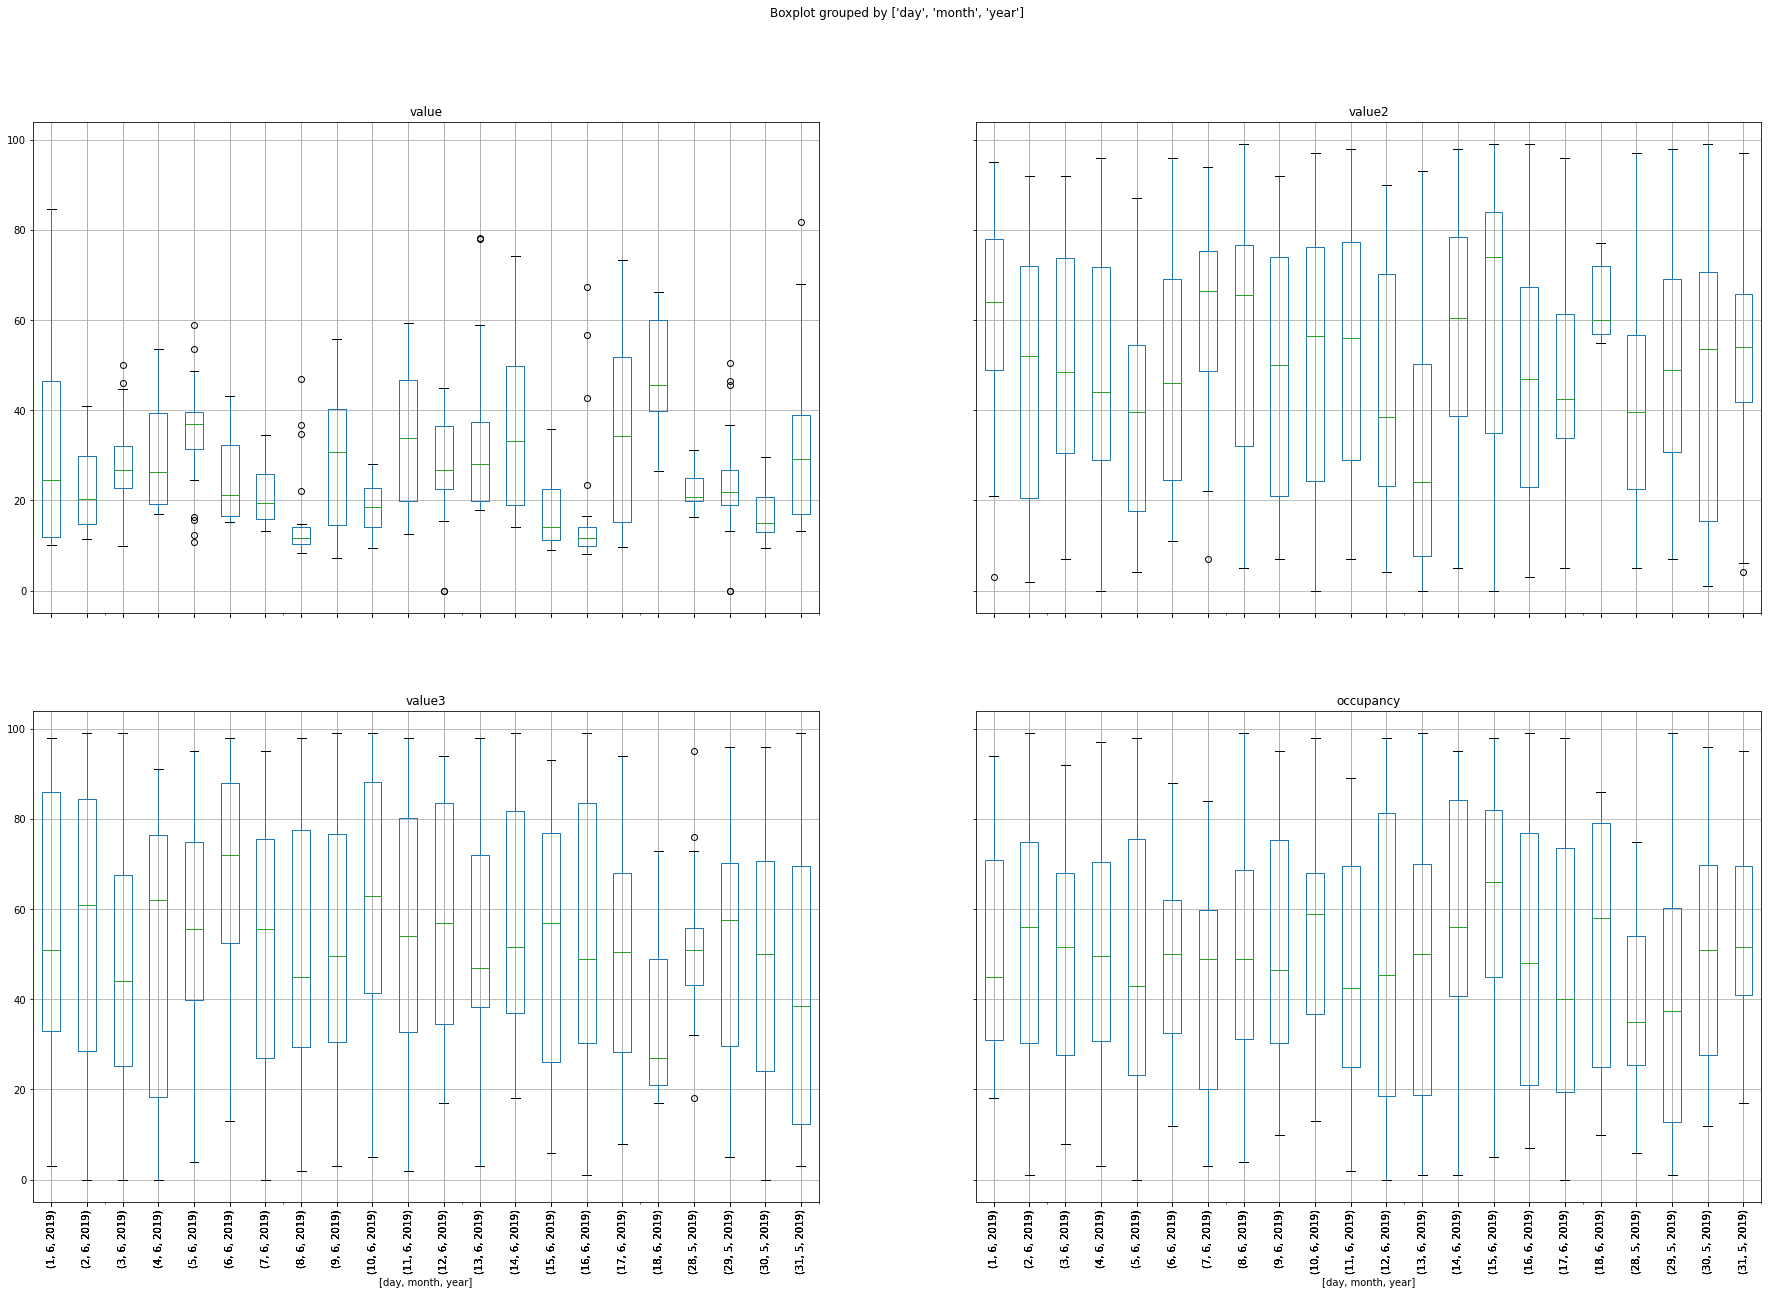

In [436]:
df["day"] = df.index.day
df["month"] = df.index.month
df["year"] = df.index.year

df.boxplot(
    ["value", "value2", "value3", "occupancy"],
    by=["day", "month", "year"],
    figsize=(30, 20),
    rot=90
)

## Expliquer ce que signifie le boxplot (les différentes barres et les points)
Prenons un seul boxplot afin d'expliquer comment interpréter un boxplot, ce boxplot va se focaliser sur la totalité de des valeurs de la colonne `value`


<AxesSubplot:>

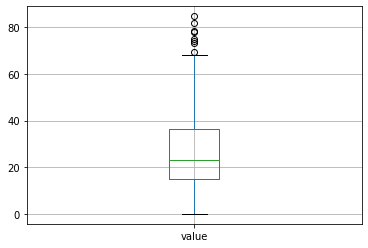

In [437]:
df.boxplot(["value"])

En partant du bas (0):
- Ici la barre la plus basse (0) représente la plus petite valeur que la colonne `value` contient
- La deuxième barre (~19) est le premier quartile (Q1), 25% des valeurs de la colonne  `value` sont plus petites
- La barre verte (~27) est le deuxième quartile, donc la médiane (Q2), 50% des valeurs de la colonne  `value` sont plus petites et 50% sont plus grandes
- La troisième barre (~35) est le troisième quartile (Q3), 75% des valeurs de la colonne  `value` sont plus petites
- La quatrième barre (~57) est la valeur maximale de la colonne `value`

Les points représente des ["données aberrantes"](https://fr.wikipedia.org/wiki/Donnée_aberrante), ce sont les valeurs de la colonne `value` qui sont jugés trop "distantes" des autres valeurs

# Exercice 4:
- Calculer et afficher l'auto-corrélation de chaque colonne. 
- Calculer le lag optimal non trivial pour chaque colonne.
- Afficher sur le même graphe chaque colonne avec la version laguée d'elle-même, avec le lag optimal obtenu précédemment.

## Calculer et afficher l'auto-corrélation de chaque colonne

In [438]:
df.value.autocorr()

0.8853117067965107

## Calculer le lag optimal non trivial pour chaque colonne

In [441]:
def find_optimal_lag(column_name: str) -> pd.DataFrame:
    """Calculate the optimal lag for a specific column of the DataFrame"""

    # Create a dataframe with a column of 1 to N - 2 (N = number of rows)
    # 1 to N - 2 because the autocorrelation with a lag of value 0 and N - 1 is equals to 1
    # you can try: with df_corr = pd.DataFrame(np.arange(0, len(df.index) - 1), columns=["n"])
    df_corr = pd.DataFrame(np.arange(1, len(df.index) - 2, dtype=int), columns=["lag"])

    # Apply the autocorrelation operation with a specif lag of n
    df_corr["corr_value"] = df_corr.lag.apply(lambda lag: abs(df[column_name].autocorr(lag=lag)))

    # Get the row with the maximum correlation value
    max_value = df_corr.iloc[df_corr.corr_value.idxmax()]

    df_corr.set_index("lag", inplace=True)
    return (df_corr, max_value)

In [442]:
(df_lag_corr_value, optimal_lag_infos) = find_optimal_lag("value")

print(f"The optimal lag is {optimal_lag_infos.lag} with a autocorrelation value of {optimal_lag_infos.corr_value}")

df_lag_corr_value

The optimal lag is 1.0 with a autocorrelation value of 0.8853117067965107


,corr_value
lag,
1,0.885312
2,0.711223
3,0.534040
4,0.373169
5,0.228490
...,...
471,0.217586
472,0.801633
473,0.553682


<AxesSubplot:xlabel='lag'>

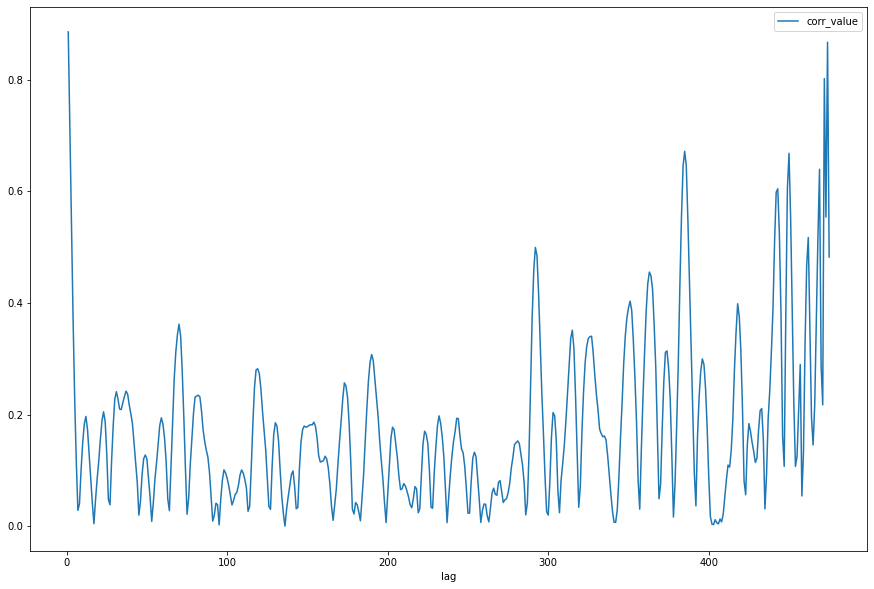

In [443]:
df_lag_corr_value.plot(figsize=(15, 10))

## Afficher sur le même graphe chaque colonne avec la version laguée d'elle-même, avec le lag optimal obtenu précédemment

Nous n'utiliserons pas:
```py
pd.plotting.autocorrelation_plot(df["value"])
```

Car le graphique affiché n'est pas cohérent avec les valeurs de lag obtenue avec la méthode de pandas: `autocorr`

```py
df.value.autocorr(lag=2065)
```

<AxesSubplot:xlabel='datetime'>

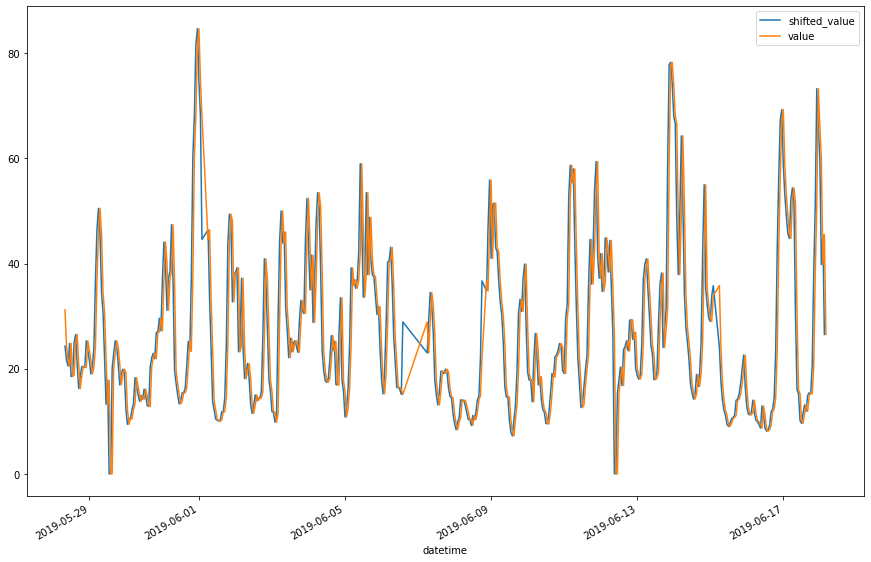

In [445]:
df["shifted_value"] = df.value.shift(int(optimal_lag_infos.lag))
df[["shifted_value", "value"]].plot(figsize=(15, 10))